In [1]:
import pandas as pd
import numpy as np

In [50]:
df = pd.read_csv("https://cocl.us/datascience_survey_data",index_col=False)
df

,Unnamed: 0,Very interested,Somewhat interested,Not interested
0,Big Data (Spark / Hadoop),1332,729,127
1,Data Analysis / Statistics,1688,444,60
2,Data Journalism,429,1081,610
3,Data Visualization,1340,734,102
4,Deep Learning,1263,770,136
5,Machine Learning,1629,477,74


In [51]:
df.set_index('Unnamed: 0',inplace=True)

In [52]:
df.index.name = "Index"

In [53]:
df.head()

,Very interested,Somewhat interested,Not interested
Index,,,
Big Data (Spark / Hadoop),1332,729,127
Data Analysis / Statistics,1688,444,60
Data Journalism,429,1081,610
Data Visualization,1340,734,102
Deep Learning,1263,770,136


In [54]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

In [55]:
df.sort_values(['Very interested'],ascending=False,axis=0,inplace=True)
df_percentage = (100.0*df/2233).round(2)
df_percentage

,Very interested,Somewhat interested,Not interested
Index,,,
Data Analysis / Statistics,75.59,19.88,2.69
Machine Learning,72.95,21.36,3.31
Data Visualization,60.01,32.87,4.57
Big Data (Spark / Hadoop),59.65,32.65,5.69
Deep Learning,56.56,34.48,6.09
Data Journalism,19.21,48.41,27.32


Text(0.5, 0, '')

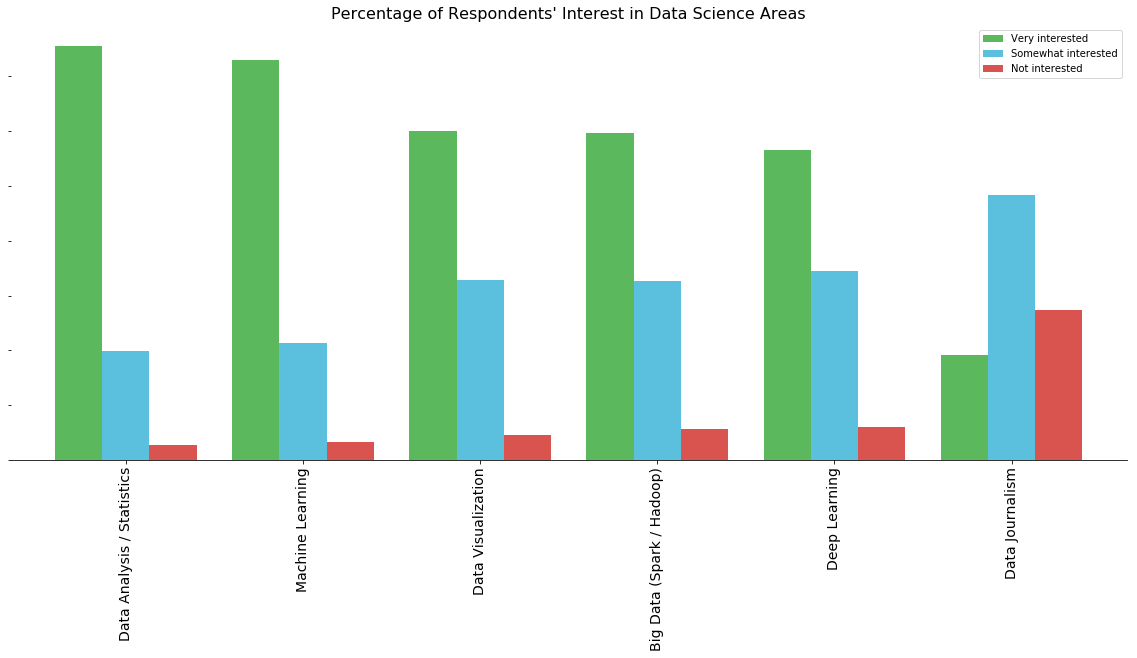

In [39]:
ax = df_percentage.plot(kind='bar',width=0.8,fontsize=14,color=['#5cb85c','#5bc0de','#d9534f'],stacked=False, 
                        figsize=(20, 8),)

ax.set_title("Percentage of Respondents\' Interest in Data Science Areas",fontsize=16)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_yticklabels("")
ax.xaxis.set_label_text("")

In [66]:
sanfransico_data = pd.read_csv("https://cocl.us/sanfran_crime_dataset")
#sanfransico_data = sanfransico_data.sort_values('Category')
sanfransico_data.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


In [67]:
total_crimes = pd.DataFrame(sanfransico_data.PdDistrict.value_counts().reset_index().values, columns=["Neighbourhood", "Count"])
#crime_yearindex = crime_year.sort_index(axis = 0, ascending=True)
total_crimes#.sort_values('Neighbourhood',ascending=True)

,Neighbourhood,Count
0,SOUTHERN,28445
1,NORTHERN,20100
2,MISSION,19503
3,CENTRAL,17666
4,BAYVIEW,14303
5,INGLESIDE,11594
6,TARAVAL,11325
7,TENDERLOIN,9942
8,RICHMOND,8922
9,PARK,8699


In [68]:
!pip install folium
import folium

In [69]:
#a = folium.Map()
!wget --quiet https://cocl.us/sanfran_geojson   
print('GeoJSON file downloaded!')

GeoJSON file downloaded!


In [70]:
world_geo = r'sanfran_geojson' # geojson file

# create a plain world map
world_map = folium.Map(location=[0, 0], zoom_start=12, tiles='Mapbox Bright')
world_map

In [71]:
world_map.choropleth(
    geo_data=world_geo,
    data=sanfransico_data,
    columns=['PdDistrict',],
    key_on='feature.properties.name',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Crime Rate in San Francisco'
)

IndexError: list index out of range